<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/01_basics/04_train_val_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))

In [3]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(raw_data['DESCR']) # opis danych

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = raw_data['data']
target = raw_data['target']
all_data = np.c_[data, target]

df_raw = pd.DataFrame(all_data, columns=raw_data['feature_names'] + ['target'])
df = df_raw.copy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df_raw2 = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
df_raw2['target'] = raw_data['target']
df2 = df_raw2.copy()
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [9]:
df.describe().apply(lambda x: round(x, 2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [11]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

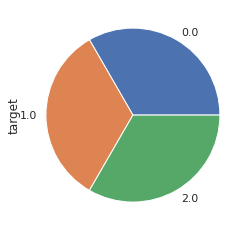

In [12]:
df.target.value_counts().plot(kind='pie')

Podział danych na testowe i treningowe

In [14]:
X = df.drop('target', axis=1).copy()
y = df['target']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #test_size = 0.25 standardowo

In [32]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'test size: {len(X_test) / len(X)}')
print(f'\ny_train distribution:\n{y_train.value_counts()}')
print(f'\ny_test distribution:\n{y_test.value_counts()}')

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)
test size: 0.2

y_train distribution:
1.0    41
0.0    40
2.0    39
Name: target, dtype: int64

y_test distribution:
2.0    11
0.0    10
1.0     9
Name: target, dtype: int64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'test size: {len(X_test) / len(X)}')
print(f'\ny_train distribution:\n{y_train.value_counts()}')
print(f'\ny_test distribution:\n{y_test.value_counts()}')

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)
test size: 0.2

y_train distribution:
0.0    40
2.0    40
1.0    40
Name: target, dtype: int64

y_test distribution:
0.0    10
2.0    10
1.0    10
Name: target, dtype: int64


#Breast cancer data

In [41]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
data = dataset['data']
target = dataset['target']

all_data = np.c_[data, target]
df_raw = pd.DataFrame(all_data, columns=list(dataset['feature_names'])+['target'])
df = df_raw.copy()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [44]:
df.isnull().sum().sum()

0

In [46]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [47]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [48]:
X = df.drop('target', axis=1).copy()
y = df['target']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'test size: {len(X_test) / len(X)}')
print(f'\ny_train distribution:\n{y_train.value_counts()}')
print(f'\ny_test distribution:\n{y_test.value_counts()}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)
test size: 0.2513181019332162

y_train distribution:
1.0    267
0.0    159
Name: target, dtype: int64

y_test distribution:
1.0    90
0.0    53
Name: target, dtype: int64


Zbiór walidacyjny można uzsykać poprzez dwukrotne wykorzystanie train_test_split

In [53]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42, stratify=y_tmp)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'train ratio: {len(X_train) / len(X)}')
print(f'val ratio: {len(X_val) / len(X)}')
print(f'test ratio: {len(X_test) / len(X)}')

X_train shape: (341, 30)
y_train shape: (341,)
X_test shape: (114, 30)
y_test shape: (114,)
X_val: (114, 30)
y_val: (114,)
train ratio: 0.5992970123022847
val ratio: 0.20035149384885764
test ratio: 0.20035149384885764


In [52]:
X.shape

(569, 30)